In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns ## For histogram and other plots
import sys
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score, f1_score,roc_curve, auc,precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import statsmodels.api as sm
pd.set_option('display.max_columns', None)
from scipy.stats import pearsonr

# #interl
# from sklearnex import patch_sklearn
# patch_sklearn()

C:\Users\20151\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
path = r"C:\Users\20151\OneDrive - EDHEC\EDHEC\Thesis\Python Codes\Data"
data = pd.read_csv(path + r"\UCI_Credit_Card.csv") 
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
data.describe().round(0)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0
mean,15000.0,167484.0,2.0,2.0,2.0,35.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,51223.0,49179.0,47013.0,43263.0,40311.0,38872.0,5664.0,5921.0,5226.0,4826.0,4799.0,5216.0,0.0
std,8660.0,129748.0,0.0,1.0,1.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,73636.0,71174.0,69349.0,64333.0,60797.0,59554.0,16563.0,23041.0,17607.0,15666.0,15278.0,17777.0,0.0
min,1.0,10000.0,1.0,0.0,0.0,21.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-165580.0,-69777.0,-157264.0,-170000.0,-81334.0,-339603.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,7501.0,50000.0,1.0,1.0,1.0,28.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3559.0,2985.0,2666.0,2327.0,1763.0,1256.0,1000.0,833.0,390.0,296.0,252.0,118.0,0.0
50%,15000.0,140000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,22382.0,21200.0,20088.0,19052.0,18104.0,17071.0,2100.0,2009.0,1800.0,1500.0,1500.0,1500.0,0.0
75%,22500.0,240000.0,2.0,2.0,2.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,67091.0,64006.0,60165.0,54506.0,50190.0,49198.0,5006.0,5000.0,4505.0,4013.0,4032.0,4000.0,0.0
max,30000.0,1000000.0,2.0,6.0,3.0,79.0,8.0,8.0,8.0,8.0,8.0,8.0,964511.0,983931.0,1664089.0,891586.0,927171.0,961664.0,873552.0,1684259.0,896040.0,621000.0,426529.0,528666.0,1.0


In [4]:
#work with the copy of the dataset
data2 = data.copy()

## Change columns names

In [5]:
#change column names
new_names = {'default.payment.next.month': 'DEF_PAY_10', 
                  'PAY_0': 'PAY_09',
                   'PAY_2':'PAY_08',
                   'PAY_3':'PAY_07',
                   'PAY_4':'PAY_06',
                   'PAY_5':'PAY_05',
                   'PAY_6':'PAY_04',
                   'BILL_AMT1':'BILL_AMT_09',
                   'BILL_AMT2':'BILL_AMT_08',
                   'BILL_AMT3':'BILL_AMT_07',
                   'BILL_AMT4':'BILL_AMT_06',
                   'BILL_AMT5':'BILL_AMT_05',
                   'BILL_AMT6':'BILL_AMT_04',
                   'PAY_AMT1':'PAY_AMT_09',
                   'PAY_AMT2':'PAY_AMT_08',
                   'PAY_AMT3':'PAY_AMT_07',
                   'PAY_AMT4':'PAY_AMT_06',
                   'PAY_AMT5':'PAY_AMT_05',
                   'PAY_AMT6':'PAY_AMT_04'
                   }

data2 = data2.rename(columns= new_names)

# FUTURE ENGINEERING

# Create new columns

In [6]:
data2['DIFF_04_05'] = data2['BILL_AMT_04']- data2['PAY_AMT_05']
data2['DIFF_05_06'] = data2['BILL_AMT_05']- data2['PAY_AMT_06']
data2['DIFF_06_07'] = data2['BILL_AMT_06']- data2['PAY_AMT_07']
data2['DIFF_07_08'] = data2['BILL_AMT_07']- data2['PAY_AMT_08']
data2['DIFF_08_09'] = data2['BILL_AMT_08']- data2['PAY_AMT_09']



In [7]:
# data2['CREDIT_UTIL_04'] = data2['BILL_AMT_04']/data2['LIMIT_BAL']
# data2['CREDIT_UTIL_05'] = data2['BILL_AMT_05']/data2['LIMIT_BAL']
# data2['CREDIT_UTIL_06'] = data2['BILL_AMT_06']/data2['LIMIT_BAL']
# data2['CREDIT_UTIL_07'] = data2['BILL_AMT_07']/data2['LIMIT_BAL']
# data2['CREDIT_UTIL_08'] = data2['BILL_AMT_08']/data2['LIMIT_BAL']

In [8]:
# data2[['CREDIT_UTIL_04','CREDIT_UTIL_05','CREDIT_UTIL_06','CREDIT_UTIL_07','CREDIT_UTIL_08']]

In [9]:
data2[['DIFF_08_09','DIFF_07_08','DIFF_06_07','DIFF_05_06','DIFF_04_05']]

,DIFF_08_09,DIFF_07_08,DIFF_06_07,DIFF_05_06,DIFF_04_05
0,3102.0,0.0,0.0,0.0,0.0
1,1725.0,1682.0,2272.0,2455.0,3261.0
2,12509.0,12059.0,13331.0,13948.0,14549.0
3,46233.0,47272.0,27114.0,27859.0,28478.0
4,3670.0,-846.0,10940.0,10146.0,18442.0
...,...,...,...,...,...
29995,184315.0,188365.0,83001.0,28190.0,10980.0
29996,-9.0,-24.0,-19.0,5061.0,0.0
29997,3356.0,2758.0,-1122.0,16382.0,17357.0
29998,-7521.0,72895.0,51596.0,9929.0,-4020.0


In [10]:
def find_last_payment(row):
    for i in range(4, -1, -1):  # Iterate over the columns in reverse order
        if row[f'DIFF_0{i+4}_0{i+5}'] <= 0:  # If the person paid the total bill in this month
            return i  # Return the index of this month if the condition is met
    return -1

def count_total_payments(row):
    return sum(1 for i in range(5) if row[f'DIFF_0{i+4}_0{i+5}'] <= 0 and row[f'PAY_AMT_0{i+5}']>0)  # Count the number of times the person paid the total bill

def count_total_zero(row):
    return sum(1 for i in range(5) if row[f'BILL_AMT_0{i+4}']==0)  # Count the number of times the person paid the total bill
# 08_09 -> 0 4
# 07_08 -> 1 3
# 06_07 -> 2 2
# 05_06 -> 3 1
# 04_05 -> 4 0
# neither = -1

In [11]:
# data2['Last_Month_Payment'] = data2.apply(find_last_payment, axis=1)
data2['TOTAL_PAYMENTS_IN_FULL'] = data2.apply(count_total_payments, axis=1)
# data2['FLG_PAY_IN_FULL']= np.where(data2['Total_Payments_in_Full']==5,1,0)
data2['TOTA_BILL_AMT_EQ_0'] = data2.apply(count_total_zero, axis=1)

data2.head(50)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_09,PAY_08,PAY_07,PAY_06,PAY_05,PAY_04,BILL_AMT_09,BILL_AMT_08,BILL_AMT_07,BILL_AMT_06,BILL_AMT_05,BILL_AMT_04,PAY_AMT_09,PAY_AMT_08,PAY_AMT_07,PAY_AMT_06,PAY_AMT_05,PAY_AMT_04,DEF_PAY_10,DIFF_04_05,DIFF_05_06,DIFF_06_07,DIFF_07_08,DIFF_08_09,TOTAL_PAYMENTS_IN_FULL,TOTA_BILL_AMT_EQ_0
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,3102.0,1,3
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,3261.0,2455.0,2272.0,1682.0,1725.0,0,0
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,14549.0,13948.0,13331.0,12059.0,12509.0,0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,28478.0,27859.0,27114.0,47272.0,46233.0,0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,18442.0,10146.0,10940.0,-846.0,3670.0,1,0
5,6,50000.0,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0,19024.0,18619.0,18737.0,55793.0,54569.0,0,0
6,7,500000.0,1,1,2,29,0,0,0,0,0,0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0,460194.0,462764.0,504653.0,405007.0,357023.0,0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,0,-1,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,-1120.0,-740.0,221.0,0.0,0.0,4,0
8,9,140000.0,2,3,1,28,0,0,2,0,0,0,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0,2719.0,10793.0,11779.0,12108.0,10767.0,0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,-1,-1,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0,12790.0,0.0,0.0,0.0,0.0,1,3


In [12]:
data2.head(20)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_09,PAY_08,PAY_07,PAY_06,PAY_05,PAY_04,BILL_AMT_09,BILL_AMT_08,BILL_AMT_07,BILL_AMT_06,BILL_AMT_05,BILL_AMT_04,PAY_AMT_09,PAY_AMT_08,PAY_AMT_07,PAY_AMT_06,PAY_AMT_05,PAY_AMT_04,DEF_PAY_10,DIFF_04_05,DIFF_05_06,DIFF_06_07,DIFF_07_08,DIFF_08_09,TOTAL_PAYMENTS_IN_FULL,TOTA_BILL_AMT_EQ_0
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,3102.0,1,3
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,3261.0,2455.0,2272.0,1682.0,1725.0,0,0
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,14549.0,13948.0,13331.0,12059.0,12509.0,0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,28478.0,27859.0,27114.0,47272.0,46233.0,0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,18442.0,10146.0,10940.0,-846.0,3670.0,1,0
5,6,50000.0,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0,19024.0,18619.0,18737.0,55793.0,54569.0,0,0
6,7,500000.0,1,1,2,29,0,0,0,0,0,0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0,460194.0,462764.0,504653.0,405007.0,357023.0,0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,0,-1,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,-1120.0,-740.0,221.0,0.0,0.0,4,0
8,9,140000.0,2,3,1,28,0,0,2,0,0,0,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0,2719.0,10793.0,11779.0,12108.0,10767.0,0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,-1,-1,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0,12790.0,0.0,0.0,0.0,0.0,1,3


In [13]:
data2.to_csv('data2.csv', index=False)

# UNIVARIATE ANALYSIS

In [14]:
for column in data2.columns:
    correlation_coefficient, p_value = pearsonr(data2[column], data2['DEF_PAY_10'])
    print(column,round(p_value,4))
# correlation_coefficient, p_value = pearsonr(x, y)

ID 0.0157
LIMIT_BAL 0.0
SEX 0.0
EDUCATION 0.0
MARRIAGE 0.0
AGE 0.0161
PAY_09 0.0
PAY_08 0.0
PAY_07 0.0
PAY_06 0.0
PAY_05 0.0
PAY_04 0.0
BILL_AMT_09 0.0007
BILL_AMT_08 0.014
BILL_AMT_07 0.0148
BILL_AMT_06 0.0786
BILL_AMT_05 0.2416
BILL_AMT_04 0.3521
PAY_AMT_09 0.0
PAY_AMT_08 0.0
PAY_AMT_07 0.0
PAY_AMT_06 0.0
PAY_AMT_05 0.0
PAY_AMT_04 0.0
DEF_PAY_10 0.0
DIFF_04_05 0.1109
DIFF_05_06 0.1536
DIFF_06_07 0.3417
DIFF_07_08 0.3253
DIFF_08_09 0.6165
TOTAL_PAYMENTS_IN_FULL 0.0
TOTA_BILL_AMT_EQ_0 0.0002


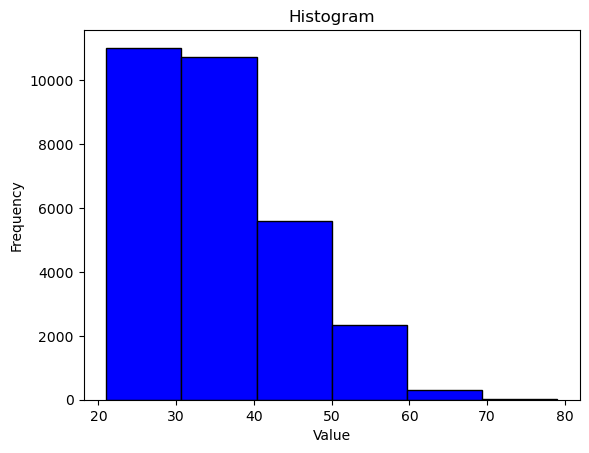

In [15]:
# Plotting the histogram
plt.hist(data['AGE'], bins=6, color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

# Displaying the plot
plt.show()

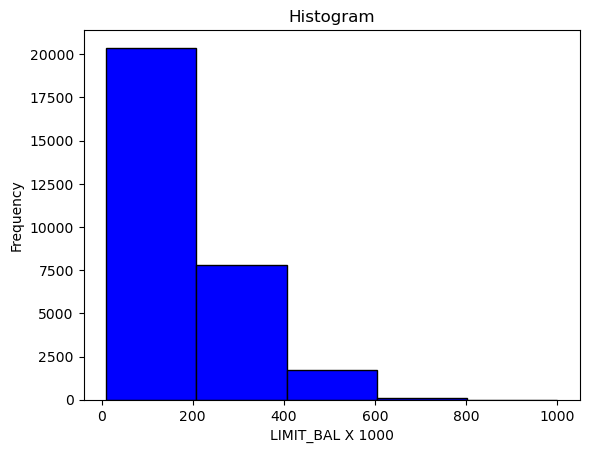

In [16]:
# Plotting the histogram
plt.hist(data['LIMIT_BAL']/1000, bins=5, color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('LIMIT_BAL X 1000')
plt.ylabel('Frequency')
plt.title('Histogram')

# Displaying the plot
plt.show()

# BIVARIATE ANALYSIS

In [17]:
cross_tab = pd.crosstab(data2['PAY_09'],data2['DEF_PAY_10'])
cross_tab

DEF_PAY_10,0,1
PAY_09,,
-2,2394,365
-1,4732,954
0,12849,1888
1,2436,1252
2,823,1844
3,78,244
4,24,52
5,13,13
6,5,6


In [18]:

excel_file_path = 'combined_series.xlsx'
df_ordered = data2[['LIMIT_BAL','PAY_AMT_04','PAY_AMT_05','PAY_AMT_06','PAY_AMT_07','PAY_AMT_08','PAY_AMT_09',
                     'BILL_AMT_04','BILL_AMT_05','BILL_AMT_06','BILL_AMT_07','BILL_AMT_08','BILL_AMT_09'
                   ]]

df_ordered.to_excel(excel_file_path, index=False)

# STANDARIZED DATA

In [19]:
data3 = data2.copy()
data3

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_09,PAY_08,PAY_07,PAY_06,PAY_05,PAY_04,BILL_AMT_09,BILL_AMT_08,BILL_AMT_07,BILL_AMT_06,BILL_AMT_05,BILL_AMT_04,PAY_AMT_09,PAY_AMT_08,PAY_AMT_07,PAY_AMT_06,PAY_AMT_05,PAY_AMT_04,DEF_PAY_10,DIFF_04_05,DIFF_05_06,DIFF_06_07,DIFF_07_08,DIFF_08_09,TOTAL_PAYMENTS_IN_FULL,TOTA_BILL_AMT_EQ_0
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,3102.0,1,3
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,3261.0,2455.0,2272.0,1682.0,1725.0,0,0
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,14549.0,13948.0,13331.0,12059.0,12509.0,0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,28478.0,27859.0,27114.0,47272.0,46233.0,0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,18442.0,10146.0,10940.0,-846.0,3670.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,10980.0,28190.0,83001.0,188365.0,184315.0,0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,0.0,5061.0,-19.0,-24.0,-9.0,3,1
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,17357.0,16382.0,-1122.0,2758.0,3356.0,1,0
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,-4020.0,9929.0,51596.0,72895.0,-7521.0,2,0


In [20]:

columns_to_scale = ['LIMIT_BAL','AGE','BILL_AMT_09','BILL_AMT_08','BILL_AMT_07','BILL_AMT_06','BILL_AMT_05','BILL_AMT_04',
                   'PAY_AMT_09','PAY_AMT_08','PAY_AMT_07','PAY_AMT_06','PAY_AMT_05','PAY_AMT_04',
                    'PAY_04','PAY_05','PAY_06','PAY_07','PAY_08','PAY_09',
                   'DIFF_08_09','DIFF_07_08','DIFF_06_07','DIFF_05_06','DIFF_04_05',
                    'TOTAL_PAYMENTS_IN_FULL','TOTA_BILL_AMT_EQ_0'
                    # 'CREDIT_UTIL_04','CREDIT_UTIL_05','CREDIT_UTIL_06','CREDIT_UTIL_07','CREDIT_UTIL_08'
                   ]

scaler = StandardScaler()

data3[columns_to_scale] =  pd.DataFrame(scaler.fit_transform(data2[columns_to_scale]),columns=columns_to_scale)


data3

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_09,PAY_08,PAY_07,PAY_06,PAY_05,PAY_04,BILL_AMT_09,BILL_AMT_08,BILL_AMT_07,BILL_AMT_06,BILL_AMT_05,BILL_AMT_04,PAY_AMT_09,PAY_AMT_08,PAY_AMT_07,PAY_AMT_06,PAY_AMT_05,PAY_AMT_04,DEF_PAY_10,DIFF_04_05,DIFF_05_06,DIFF_06_07,DIFF_07_08,DIFF_08_09,TOTAL_PAYMENTS_IN_FULL,TOTA_BILL_AMT_EQ_0
0,1,-1.136720,2,2,1,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1,-0.600445,-0.610073,-0.619585,-0.624672,-0.590821,-0.071115,1.920967
1,2,-0.365981,2,2,2,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1,-0.542978,-0.567866,-0.582576,-0.599103,-0.610952,-0.658839,-0.418411
2,3,-0.597202,2,2,2,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0,-0.344053,-0.370276,-0.402438,-0.441354,-0.453297,-0.658839,-0.418411
3,4,-0.905498,2,2,1,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0,-0.098588,-0.131114,-0.177928,0.093947,0.039728,-0.658839,-0.418411
4,5,-0.905498,1,2,1,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0,-0.275448,-0.435641,-0.441384,-0.637533,-0.582518,-0.071115,-0.418411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,0.404759,1,3,1,0.381275,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,1.870379,2.018136,2.326690,0.695474,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130,0,-0.406949,-0.125423,0.732409,2.238815,2.058406,-0.658839,-0.418411
29996,29997,-0.134759,1,3,2,0.815221,-0.874991,-0.723570,-0.696663,-0.666599,0.234917,0.253137,-0.672786,-0.665299,-0.627430,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382,0,-0.600445,-0.523063,-0.619894,-0.625037,-0.636302,1.104334,0.361382
29997,29998,-1.059646,1,2,2,0.164303,3.574267,2.617654,1.809921,-0.666599,0.234917,0.253137,-0.647227,-0.643830,-0.638158,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001,1,-0.294569,-0.328430,-0.637861,-0.582746,-0.587108,-0.071115,-0.418411
29998,29999,-0.674276,1,3,1,0.598248,0.904712,-0.723570,0.138865,0.188746,0.234917,-0.616452,-0.717982,0.410269,0.422373,0.147844,-0.468063,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904,1,-0.671288,-0.439371,0.220857,0.483463,-0.746123,0.516610,-0.418411


In [21]:
# data = data.rename(columns={'default.payment.next.month': 'def_pay'})
# data.head()

In [22]:
data3.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_09,PAY_08,PAY_07,PAY_06,PAY_05,PAY_04,BILL_AMT_09,BILL_AMT_08,BILL_AMT_07,BILL_AMT_06,BILL_AMT_05,BILL_AMT_04,PAY_AMT_09,PAY_AMT_08,PAY_AMT_07,PAY_AMT_06,PAY_AMT_05,PAY_AMT_04,DEF_PAY_10,DIFF_04_05,DIFF_05_06,DIFF_06_07,DIFF_07_08,DIFF_08_09,TOTAL_PAYMENTS_IN_FULL,TOTA_BILL_AMT_EQ_0
count,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,30000.000000,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04
mean,15000.500000,-6.063298e-17,1.603733,1.853133,1.551867,-1.856885e-16,-1.894781e-17,4.926430e-17,-5.494864e-17,3.126388e-17,-3.031649e-17,4.547474e-17,-1.231607e-17,-3.789561e-17,6.252776e-17,5.873820e-17,-2.368476e-17,1.136868e-17,-4.736952e-18,1.373716e-17,2.084259e-17,1.800042e-17,-1.965835e-17,-1.788199e-17,0.221200,-3.647453e-17,3.600083e-17,3.979039e-17,-2.178998e-17,9.473903e-18,-1.894781e-18,4.073778e-17
std,8660.398374,1.000017e+00,0.489129,0.790349,0.521970,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,0.415062,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,1.000000,-1.213794e+00,1.000000,0.000000,0.000000,-1.571479e+00,-1.764843e+00,-1.558876e+00,-1.532192e+00,-1.521944e+00,-1.530046e+00,-1.486041e+00,-2.944312e+00,-1.671375e+00,-2.945672e+00,-3.315048e+00,-2.000874e+00,-6.355247e+00,-3.419416e-01,-2.569895e-01,-2.968013e-01,-3.080626e-01,-3.141361e-01,-2.933821e-01,0.000000,-6.585148e+00,-6.723113e+00,-1.174672e+01,-1.857905e+01,-1.082311e+01,-6.588392e-01,-4.184108e-01
25%,7500.750000,-9.054983e-01,1.000000,1.000000,1.000000,-8.120745e-01,-8.749911e-01,-7.235699e-01,-6.966635e-01,-6.665987e-01,-6.475648e-01,-6.164517e-01,-6.473120e-01,-6.490466e-01,-6.394814e-01,-6.363293e-01,-6.340600e-01,-6.316338e-01,-2.815661e-01,-2.208358e-01,-2.746506e-01,-2.891680e-01,-2.976091e-01,-2.867584e-01,0.000000,-6.004453e-01,-6.100734e-01,-6.195848e-01,-6.246722e-01,-6.361709e-01,-6.588392e-01,-4.184108e-01
50%,15000.500000,-2.118326e-01,2.000000,2.000000,2.000000,-1.611565e-01,1.486052e-02,1.117361e-01,1.388648e-01,1.887461e-01,2.349165e-01,2.531374e-01,-3.916884e-01,-3.931159e-01,-3.882529e-01,-3.763451e-01,-3.652683e-01,-3.660725e-01,-2.151530e-01,-1.697952e-01,-1.945673e-01,-2.123132e-01,-2.159561e-01,-2.090042e-01,0.000000,-3.974236e-01,-3.797056e-01,-3.759193e-01,-3.816031e-01,-3.937445e-01,-6.588392e-01,-4.184108e-01
75%,22500.250000,5.589071e-01,2.000000,2.000000,2.000000,5.982479e-01,1.486052e-02,1.117361e-01,1.388648e-01,1.887461e-01,2.349165e-01,2.531374e-01,2.154919e-01,2.083271e-01,1.896457e-01,1.747667e-01,1.624955e-01,1.733997e-01,-3.970176e-02,-3.998021e-02,-4.093230e-02,-5.188511e-02,-5.026084e-02,-6.837436e-02,0.000000,1.861370e-01,1.793313e-01,1.676205e-01,1.889699e-01,1.990689e-01,5.166098e-01,-4.184108e-01
max,30000.000000,6.416528e+00,2.000000,6.000000,3.000000,4.720729e+00,7.133674e+00,6.794184e+00,6.823091e+00,7.031505e+00,7.294767e+00,7.209850e+00,1.240296e+01,1.313360e+01,2.331820e+01,1.318669e+01,1.458743e+01,1.549528e+01,5.239921e+01,7.284299e+01,5.059528e+01,3.933218e+01,2.760363e+01,2.944510e+01,1.000000,1.546549e+01,1.447049e+01,1.040578e+01,9.661519e+00,1.300589e+01,2.279783e+00,3.480553e+00


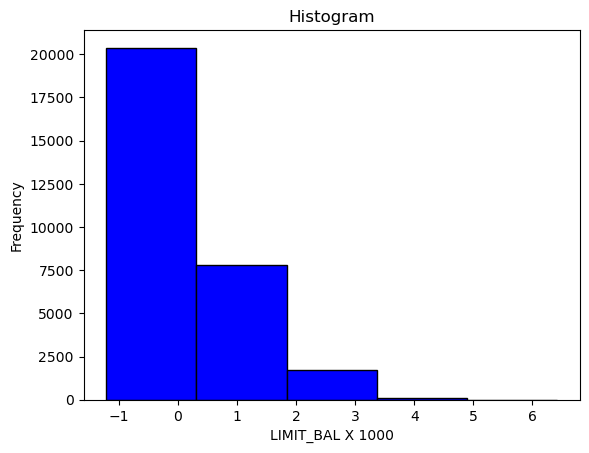

In [23]:
# Plotting the histogram
plt.hist(data3['LIMIT_BAL'], bins=5, color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('LIMIT_BAL X 1000')
plt.ylabel('Frequency')
plt.title('Histogram')

# Displaying the plot
plt.show()

In [24]:
#categorical variables
data2[['SEX', 'EDUCATION', 'MARRIAGE']].describe().round(2)

,SEX,EDUCATION,MARRIAGE
count,30000.00,30000.00,30000.00
mean,1.60,1.85,1.55
std,0.49,0.79,0.52
min,1.00,0.00,0.00
25%,1.00,1.00,1.00
50%,2.00,2.00,2.00
75%,2.00,2.00,2.00
max,2.00,6.00,3.00


In [25]:
# Payment delay description
data2[['PAY_04','PAY_05','PAY_06','PAY_07','PAY_08','PAY_09']].describe().round(2)

,PAY_04,PAY_05,PAY_06,PAY_07,PAY_08,PAY_09
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,-0.29,-0.27,-0.22,-0.17,-0.13,-0.02
std,1.15,1.13,1.17,1.20,1.20,1.12
min,-2.00,-2.00,-2.00,-2.00,-2.00,-2.00
25%,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
50%,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00
max,8.00,8.00,8.00,8.00,8.00,8.00


In [26]:
# Bill Statement description
data2[['BILL_AMT_04','BILL_AMT_05','BILL_AMT_06','BILL_AMT_07','BILL_AMT_08','BILL_AMT_09']].describe().round(2)

,BILL_AMT_04,BILL_AMT_05,BILL_AMT_06,BILL_AMT_07,BILL_AMT_08,BILL_AMT_09
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,38871.76,40311.40,43262.95,47013.15,49179.08,51223.33
std,59554.11,60797.16,64332.86,69349.39,71173.77,73635.86
min,-339603.00,-81334.00,-170000.00,-157264.00,-69777.00,-165580.00
25%,1256.00,1763.00,2326.75,2666.25,2984.75,3558.75
50%,17071.00,18104.50,19052.00,20088.50,21200.00,22381.50
75%,49198.25,50190.50,54506.00,60164.75,64006.25,67091.00
max,961664.00,927171.00,891586.00,1664089.00,983931.00,964511.00


In [27]:
#Previous Payment Description
data2[['PAY_AMT_04','PAY_AMT_05','PAY_AMT_06','PAY_AMT_07','PAY_AMT_08','PAY_AMT_09']].describe().round(2)

,PAY_AMT_04,PAY_AMT_05,PAY_AMT_06,PAY_AMT_07,PAY_AMT_08,PAY_AMT_09
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,5215.50,4799.39,4826.08,5225.68,5921.16,5663.58
std,17777.47,15278.31,15666.16,17606.96,23040.87,16563.28
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,117.75,252.50,296.00,390.00,833.00,1000.00
50%,1500.00,1500.00,1500.00,1800.00,2009.00,2100.00
75%,4000.00,4031.50,4013.25,4505.00,5000.00,5006.00
max,528666.00,426529.00,621000.00,896040.00,1684259.00,873552.00


In [28]:
data2.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [29]:
#1:male and 2:female
freq_column1 = data2['SEX'].value_counts()
category_percentage = data2['SEX'].value_counts(normalize=True)*100
mean_sex = data2.groupby('SEX')['DEF_PAY_10'].mean()
print(freq_column1)
print(category_percentage)
print(mean_sex)

SEX
2    18112
1    11888
Name: count, dtype: int64
SEX
2    60.373333
1    39.626667
Name: proportion, dtype: float64
SEX
1    0.241672
2    0.207763
Name: DEF_PAY_10, dtype: float64


In [30]:
#table of requencies for SEX
result_table = data2.groupby('SEX').agg({
    'DEF_PAY_10': ['count', lambda x: (x == 1).sum(), lambda x: (x == 0).sum(), 'mean']
})
result_table.columns = ['n', 'defaulters', 'no defaulters', 'mean']
print(result_table)

         n  defaulters  no defaulters      mean
SEX                                            
1    11888        2873           9015  0.241672
2    18112        3763          14349  0.207763


In [31]:
#2:university , 1:graduate school , 3:high school, 4,5,6,0:unknownn
freq_column1 = data2['EDUCATION'].value_counts()
category_percentage = data2['EDUCATION'].value_counts(normalize=True)*100
print(freq_column1)
print(category_percentage)

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64
EDUCATION
2    46.766667
1    35.283333
3    16.390000
5     0.933333
4     0.410000
6     0.170000
0     0.046667
Name: proportion, dtype: float64


In [32]:
#table of requencies for EDUCATION
result_table = data2.groupby('EDUCATION').agg({
    'DEF_PAY_10': ['count', lambda x: (x == 1).sum(), lambda x: (x == 0).sum(), 'mean']
})
result_table.columns = ['n', 'defaulters', 'no defaulters', 'mean']

print(result_table)

               n  defaulters  no defaulters      mean
EDUCATION                                            
0             14           0             14  0.000000
1          10585        2036           8549  0.192348
2          14030        3330          10700  0.237349
3           4917        1237           3680  0.251576
4            123           7            116  0.056911
5            280          18            262  0.064286
6             51           8             43  0.156863


In [33]:
#2:single , 1:married, 3,0: others
freq_column1 = data2['MARRIAGE'].value_counts()
category_percentage = data2['MARRIAGE'].value_counts(normalize=True)*100

print(freq_column1)
print(category_percentage)

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64
MARRIAGE
2    53.213333
1    45.530000
3     1.076667
0     0.180000
Name: proportion, dtype: float64


C:\Users\20151\AppData\Local\Temp\ipykernel_8\2431855022.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = data_age.groupby('Age Group')['DEF_PAY_10'].mean()


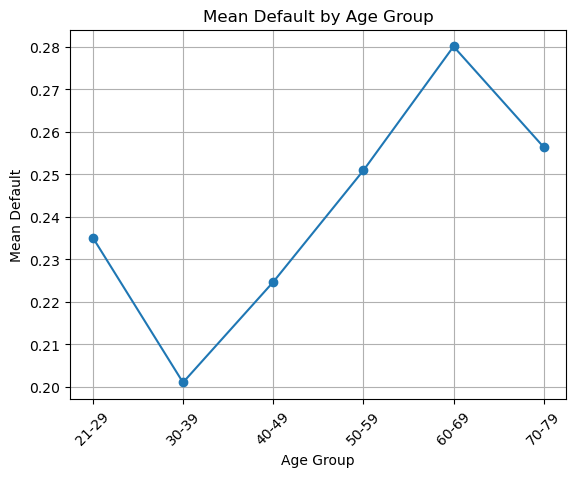

In [34]:
age_bins = [21, 29,39,49,59,69,79]
age_labels = ['21-29', '30-39','40-49','50-59','60-69','70-79']


data_age = data2.copy()
# # Create 'Age Range' column using pd.cut
data_age['Age Group'] =pd.cut(data['AGE'], bins=age_bins, labels=age_labels, right=False)
grouped_df = data_age.groupby('Age Group')['DEF_PAY_10'].mean()

# Plot the line graph
plt.plot(grouped_df.index, grouped_df.values, marker='o')
plt.title('Mean Default by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mean Default')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

In [35]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      30000 non-null  int64  
 1   LIMIT_BAL               30000 non-null  float64
 2   SEX                     30000 non-null  int64  
 3   EDUCATION               30000 non-null  int64  
 4   MARRIAGE                30000 non-null  int64  
 5   AGE                     30000 non-null  int64  
 6   PAY_09                  30000 non-null  int64  
 7   PAY_08                  30000 non-null  int64  
 8   PAY_07                  30000 non-null  int64  
 9   PAY_06                  30000 non-null  int64  
 10  PAY_05                  30000 non-null  int64  
 11  PAY_04                  30000 non-null  int64  
 12  BILL_AMT_09             30000 non-null  float64
 13  BILL_AMT_08             30000 non-null  float64
 14  BILL_AMT_07             30000 non-null

In [36]:
data2[['PAY_04', 'PAY_05', 'PAY_06', 'PAY_07', 'PAY_08', 'PAY_09']].describe().round(2)

,PAY_04,PAY_05,PAY_06,PAY_07,PAY_08,PAY_09
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,-0.29,-0.27,-0.22,-0.17,-0.13,-0.02
std,1.15,1.13,1.17,1.20,1.20,1.12
min,-2.00,-2.00,-2.00,-2.00,-2.00,-2.00
25%,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
50%,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00
max,8.00,8.00,8.00,8.00,8.00,8.00


In [37]:
data2[['DEF_PAY_10']].describe()

,DEF_PAY_10
count,30000.000000
mean,0.221200
std,0.415062
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [38]:
#CHANGING SEX COLUMN
sex_dummies = pd.get_dummies(data['SEX'])
sex_dummies = sex_dummies.rename(columns={1:'Sex_M',2:'Sex_F'})
sex_dummies = sex_dummies.astype(int)
sex_dummies

,Sex_M,Sex_F
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
29995,1,0
29996,1,0
29997,1,0
29998,1,0


In [39]:
#agrupar the 0's and 3's into one category
grouped_counts = data.groupby('MARRIAGE').size().reset_index(name='Count')
grouped_counts

,MARRIAGE,Count
0,0,54
1,1,13659
2,2,15964
3,3,323


In [40]:
np.where((data2['MARRIAGE']==0) | (data2['MARRIAGE']==3),3,data2['MARRIAGE'])

array([1, 2, 2, ..., 2, 1, 1], dtype=int64)

In [41]:
#CHANGING MARRIAGE COLUMN
#0,3: others
#1: married
#2: single
marriage_cleaned = np.where((data2['MARRIAGE']==0) | (data2['MARRIAGE']==3),3,data2['MARRIAGE'])

status = pd.get_dummies(marriage_cleaned,prefix='Marriage')
status  = status.astype(int)
status


#Marriage_1: married
#Marriage_2: single
#Marriage_3: others

,Marriage_1,Marriage_2,Marriage_3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
29995,1,0,0
29996,0,1,0
29997,0,1,0
29998,1,0,0


In [42]:
marriage_cleaned

array([1, 2, 2, ..., 2, 1, 1], dtype=int64)

In [43]:
marriage_cleaned

array([1, 2, 2, ..., 2, 1, 1], dtype=int64)

In [44]:
data2

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_09,PAY_08,PAY_07,PAY_06,PAY_05,PAY_04,BILL_AMT_09,BILL_AMT_08,BILL_AMT_07,BILL_AMT_06,BILL_AMT_05,BILL_AMT_04,PAY_AMT_09,PAY_AMT_08,PAY_AMT_07,PAY_AMT_06,PAY_AMT_05,PAY_AMT_04,DEF_PAY_10,DIFF_04_05,DIFF_05_06,DIFF_06_07,DIFF_07_08,DIFF_08_09,TOTAL_PAYMENTS_IN_FULL,TOTA_BILL_AMT_EQ_0
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,3102.0,1,3
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,3261.0,2455.0,2272.0,1682.0,1725.0,0,0
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,14549.0,13948.0,13331.0,12059.0,12509.0,0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,28478.0,27859.0,27114.0,47272.0,46233.0,0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,18442.0,10146.0,10940.0,-846.0,3670.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,10980.0,28190.0,83001.0,188365.0,184315.0,0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,0.0,5061.0,-19.0,-24.0,-9.0,3,1
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,17357.0,16382.0,-1122.0,2758.0,3356.0,1,0
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,-4020.0,9929.0,51596.0,72895.0,-7521.0,2,0


In [45]:
# data2 = pd.concat([data, status], axis=1)

In [46]:
#CHANGE EDUCATION COLUMN

In [47]:
#agrupar the 0's and 3's into one category
grouped_counts = data.groupby('EDUCATION').size().reset_index(name='Count')
grouped_counts

,EDUCATION,Count
0,0,14
1,1,10585
2,2,14030
3,3,4917
4,4,123
5,5,280
6,6,51


In [48]:
data['EDUCATION'].unique()


array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [49]:
#0,4,5,6: Others
#1: Graduate School
#2: University
#3: High School
education_cleaned = np.where((data2['EDUCATION']==0) | (data2['EDUCATION']==4) | 
                               (data2['EDUCATION']==5)| (data2['EDUCATION']==6) ,4,data2['EDUCATION']) 


data2

education = pd.get_dummies(education_cleaned,prefix='Education')
education  = education.astype(int)
education

#Education_1: Graduate School
#Education_2: University
#Education_3: High School
#Education_4: Others

,Education_1,Education_2,Education_3,Education_4
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
29995,0,0,1,0
29996,0,0,1,0
29997,0,1,0,0
29998,0,0,1,0


In [50]:
education_cleaned

array([2, 2, 2, ..., 2, 3, 2], dtype=int64)

In [51]:
data2

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_09,PAY_08,PAY_07,PAY_06,PAY_05,PAY_04,BILL_AMT_09,BILL_AMT_08,BILL_AMT_07,BILL_AMT_06,BILL_AMT_05,BILL_AMT_04,PAY_AMT_09,PAY_AMT_08,PAY_AMT_07,PAY_AMT_06,PAY_AMT_05,PAY_AMT_04,DEF_PAY_10,DIFF_04_05,DIFF_05_06,DIFF_06_07,DIFF_07_08,DIFF_08_09,TOTAL_PAYMENTS_IN_FULL,TOTA_BILL_AMT_EQ_0
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,3102.0,1,3
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,3261.0,2455.0,2272.0,1682.0,1725.0,0,0
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,14549.0,13948.0,13331.0,12059.0,12509.0,0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,28478.0,27859.0,27114.0,47272.0,46233.0,0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,18442.0,10146.0,10940.0,-846.0,3670.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,10980.0,28190.0,83001.0,188365.0,184315.0,0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,0.0,5061.0,-19.0,-24.0,-9.0,3,1
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,17357.0,16382.0,-1122.0,2758.0,3356.0,1,0
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,-4020.0,9929.0,51596.0,72895.0,-7521.0,2,0


## Final file

In [52]:
#join all columns
data_final = data3.drop(['ID','SEX','EDUCATION','MARRIAGE'],axis=1)

data_final = pd.concat([data_final,sex_dummies['Sex_M'],status['Marriage_2'],status['Marriage_3'],education['Education_1'],
                        education['Education_3'],education['Education_4']], axis=1)


data_final

,LIMIT_BAL,AGE,PAY_09,PAY_08,PAY_07,PAY_06,PAY_05,PAY_04,BILL_AMT_09,BILL_AMT_08,BILL_AMT_07,BILL_AMT_06,BILL_AMT_05,BILL_AMT_04,PAY_AMT_09,PAY_AMT_08,PAY_AMT_07,PAY_AMT_06,PAY_AMT_05,PAY_AMT_04,DEF_PAY_10,DIFF_04_05,DIFF_05_06,DIFF_06_07,DIFF_07_08,DIFF_08_09,TOTAL_PAYMENTS_IN_FULL,TOTA_BILL_AMT_EQ_0,Sex_M,Marriage_2,Marriage_3,Education_1,Education_3,Education_4
0,-1.136720,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1,-0.600445,-0.610073,-0.619585,-0.624672,-0.590821,-0.071115,1.920967,0,0,0,0,0,0
1,-0.365981,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1,-0.542978,-0.567866,-0.582576,-0.599103,-0.610952,-0.658839,-0.418411,0,1,0,0,0,0
2,-0.597202,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0,-0.344053,-0.370276,-0.402438,-0.441354,-0.453297,-0.658839,-0.418411,0,1,0,0,0,0
3,-0.905498,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0,-0.098588,-0.131114,-0.177928,0.093947,0.039728,-0.658839,-0.418411,0,0,0,0,0,0
4,-0.905498,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0,-0.275448,-0.435641,-0.441384,-0.637533,-0.582518,-0.071115,-0.418411,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,0.381275,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,1.870379,2.018136,2.326690,0.695474,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130,0,-0.406949,-0.125423,0.732409,2.238815,2.058406,-0.658839,-0.418411,1,0,0,0,1,0
29996,-0.134759,0.815221,-0.874991,-0.723570,-0.696663,-0.666599,0.234917,0.253137,-0.672786,-0.665299,-0.627430,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382,0,-0.600445,-0.523063,-0.619894,-0.625037,-0.636302,1.104334,0.361382,1,1,0,0,1,0
29997,-1.059646,0.164303,3.574267,2.617654,1.809921,-0.666599,0.234917,0.253137,-0.647227,-0.643830,-0.638158,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001,1,-0.294569,-0.328430,-0.637861,-0.582746,-0.587108,-0.071115,-0.418411,1,1,0,0,0,0
29998,-0.674276,0.598248,0.904712,-0.723570,0.138865,0.188746,0.234917,-0.616452,-0.717982,0.410269,0.422373,0.147844,-0.468063,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904,1,-0.671288,-0.439371,0.220857,0.483463,-0.746123,0.516610,-0.418411,1,0,0,0,1,0


In [53]:
data_final.to_csv('data_final.csv', index=False)

# Correlations per group

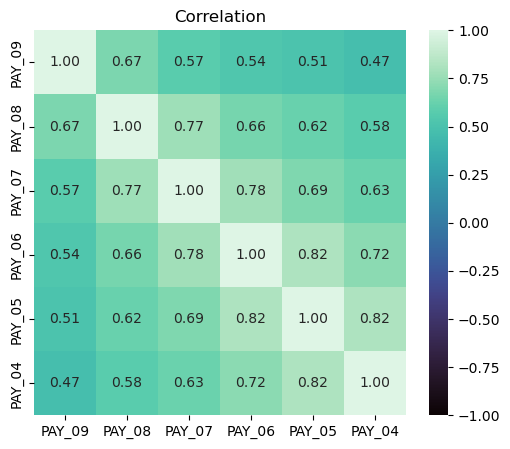

In [54]:
corr1= data_final.iloc[:,2:8].corr()

#Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(corr1, annot=True, vmin=-1.0, cmap ='mako', fmt='.2f')
plt.title('Correlation')
plt.show()

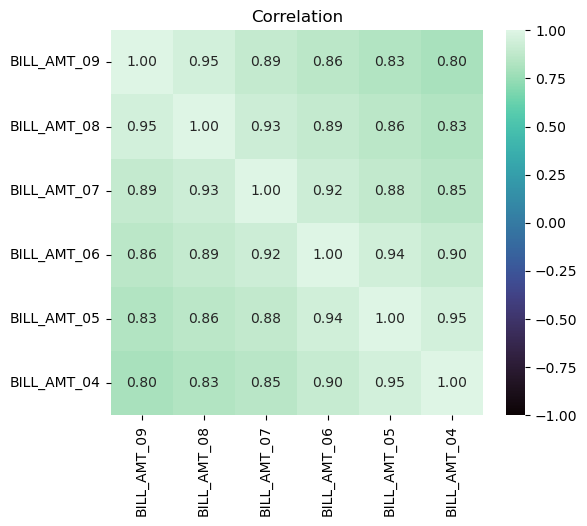

In [55]:
corr1= data_final.iloc[:,8:14].corr()

#Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(corr1, annot=True, vmin=-1.0, cmap ='mako', fmt='.2f')
plt.title('Correlation')
plt.show()

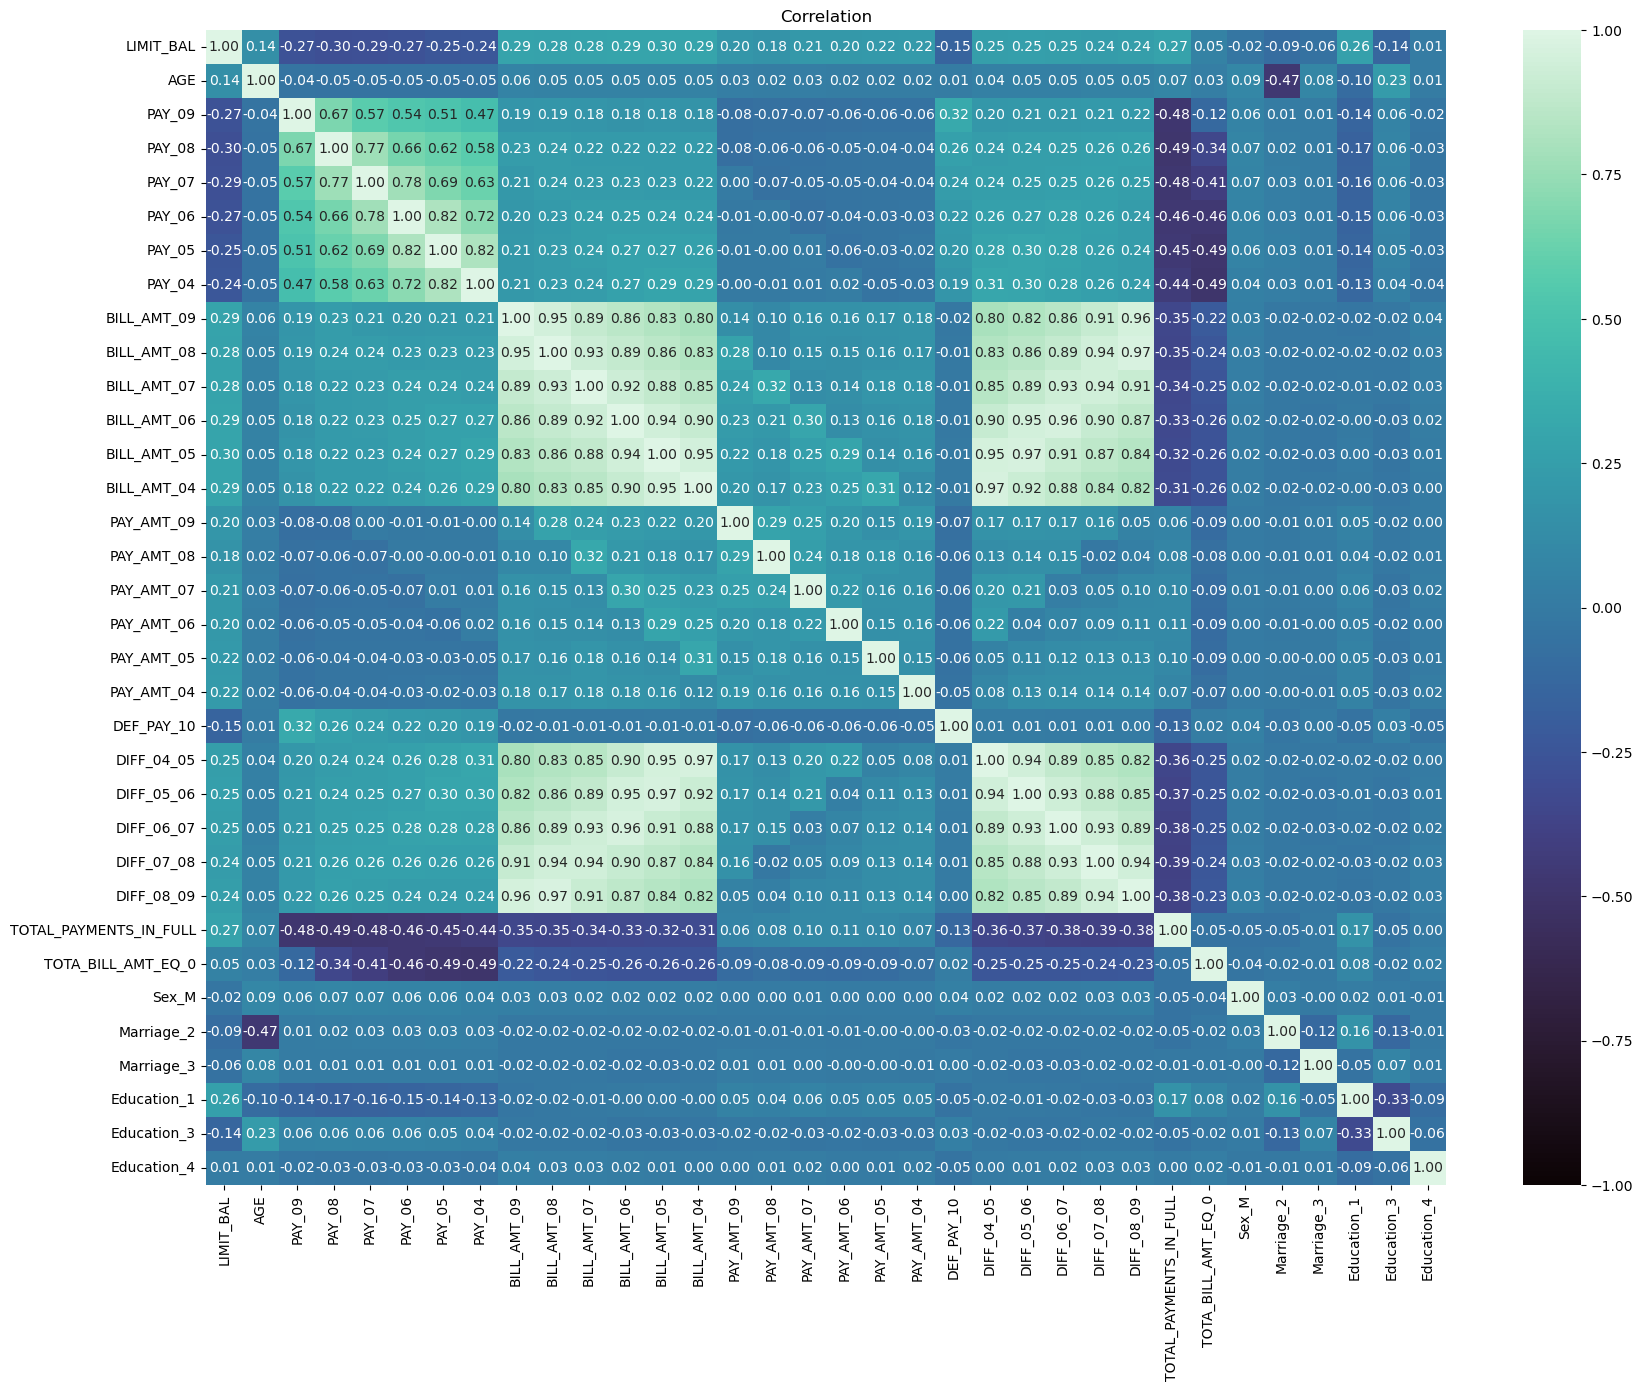

In [56]:
corr1= data_final.corr()

#Plot heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr1, annot=True, vmin=-1.0, cmap ='mako', fmt='.2f')
plt.title('Correlation')
plt.show()

In [57]:
corr1= data_final.iloc[:,8:14].corr()


In [58]:
bill_amt_df = pd.concat([data_final.iloc[:,8:14],data_final['DEF_PAY_10']],axis=1)

In [59]:
corr_bil_amt = bill_amt_df.corr()['DEF_PAY_10'][0:6]

In [60]:
corr_bil_amt

BILL_AMT_09   -0.019644
BILL_AMT_08   -0.014193
BILL_AMT_07   -0.014076
BILL_AMT_06   -0.010156
BILL_AMT_05   -0.006760
BILL_AMT_04   -0.005372
Name: DEF_PAY_10, dtype: float64

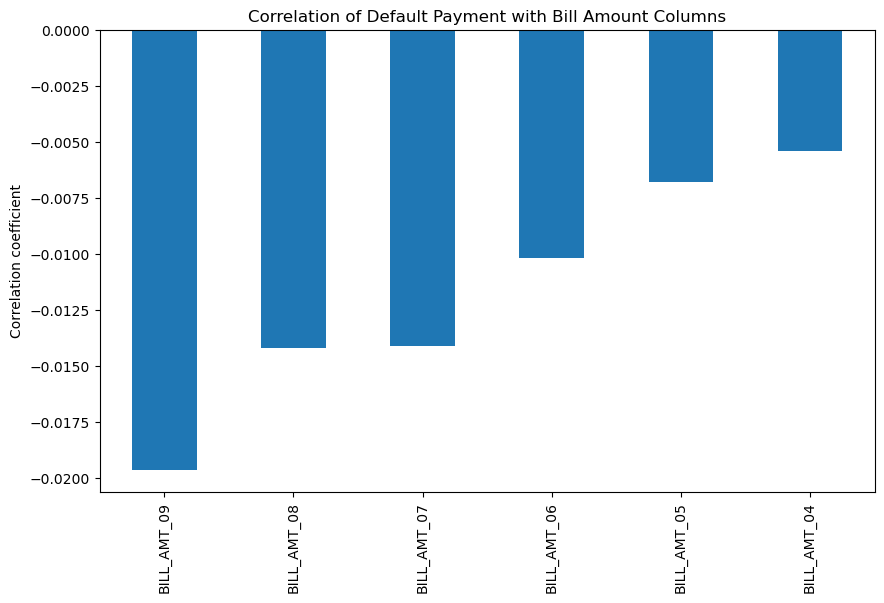

In [61]:
plt.figure(figsize=(10, 6))
corr_bil_amt.plot(kind='bar')
plt.title(f'Correlation of Default Payment with Bill Amount Columns')
plt.ylabel('Correlation coefficient')
plt.show()

In [62]:
pay_amt_df = pd.concat([data_final.iloc[:,2:8],data_final['DEF_PAY_10']],axis=1)

In [63]:
corr_pay_amt = pay_amt_df.corr()['DEF_PAY_10'][0:5]

In [64]:
corr_pay_amt

PAY_09    0.324794
PAY_08    0.263551
PAY_07    0.235253
PAY_06    0.216614
PAY_05    0.204149
Name: DEF_PAY_10, dtype: float64

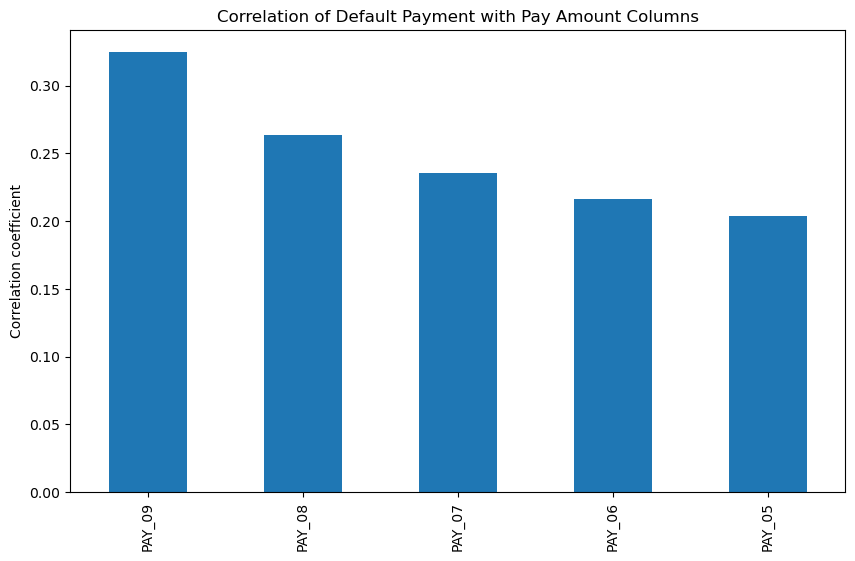

In [65]:
plt.figure(figsize=(10, 6))
corr_pay_amt.plot(kind='bar')
plt.title(f'Correlation of Default Payment with Pay Amount Columns')
plt.ylabel('Correlation coefficient')
plt.show()